In [13]:
import sys, os
sys.path.append(os.path.realpath(".."))

import util_funcs
from importlib import reload
reload(util_funcs)
from copy import deepcopy as cp

import data_reader as read
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import pywt
import tsfresh.feature_extraction.feature_calculators as feats
import constants
import clinical_text_analysis as cta
reload(cta)
import tsfresh

from os import path

reload(read)
import wf_analysis.datasets as wfdata
import wf_analysis.filters as filt
reload(filt)
import time

In [19]:
edfDatum = read.EdfDataset("train", "01_tcp_ar",filter=True, hp_cutoff=60)[0][0]

In [20]:
edfDatum

,EEG T5-REF,EEG C3-REF,EEG A1-REF,EEG P4-REF,EEG F8-REF,EEG F3-REF,EEG CZ-REF,EEG O2-REF,EEG A2-REF,EEG P3-REF,...,EEG O1-REF,EEG T4-REF,EEG F4-REF,EEG F7-REF,EEG PZ-REF,EEG FP1-REF,EEG FZ-REF,EEG T3-REF,EEG T6-REF,EEG FP2-REF
00:00:00,36.911666,33.804212,40.724493,64.840625,17.504375,26.235750,38.646502,35.119637,27.570239,64.935946,...,17.580632,22.156025,-7.965311,14.034702,21.393459,-48.381279,20.440252,29.152562,35.615305,-89.159467
00:00:00.008000,52.403659,33.212900,43.954198,71.005859,11.053375,25.252414,41.372356,44.237151,27.145019,71.101555,...,31.185403,17.706014,-14.592870,10.944391,30.819136,-50.058814,17.775513,31.021270,37.661976,-95.992395
00:00:00.016000,64.823631,30.421506,51.598615,78.285093,12.179099,22.304830,45.232782,59.708860,35.713642,76.034488,...,47.773737,26.930077,-16.712272,12.458900,42.301529,-55.162412,16.813677,35.362285,48.980634,-99.386707
00:00:00.024000,75.409433,34.747901,62.862199,86.458601,16.361479,23.626317,49.381548,69.976291,41.999326,82.581635,...,59.843542,30.591154,-15.680976,16.261834,48.446122,-56.660173,16.401841,42.758393,56.494308,-101.656452
00:00:00.032000,78.412847,36.349734,68.262593,76.123168,3.337496,18.533439,46.086371,66.694566,31.054258,82.373067,...,60.263292,18.312538,-22.258958,14.492477,44.642480,-60.760201,12.865771,41.419937,47.591948,-115.607991
00:00:00.040000,80.810600,39.188370,71.302351,75.405421,-1.778740,19.919732,46.049699,67.821236,28.957813,86.314634,...,63.539573,13.988754,-23.657903,9.514300,41.879629,-68.771189,14.079759,48.459720,46.063546,-125.557685
00:00:00.048000,72.623106,35.504669,63.850199,71.033596,1.635805,18.339400,43.369162,63.061301,34.063711,79.044006,...,59.952494,16.710841,-22.136793,11.686027,38.505660,-64.138683,12.739762,41.837889,44.118459,-117.314524
00:00:00.056000,62.150419,34.387878,51.998736,73.189995,11.870903,21.185755,42.710832,59.287768,46.418478,73.169459,...,57.504096,24.782853,-15.148044,6.632728,35.846747,-65.534328,16.080747,33.617362,46.126576,-113.742696
00:00:00.064000,50.176256,33.670511,48.837675,65.003043,15.893492,26.640256,41.014579,46.033717,43.469039,67.057812,...,45.592282,26.426346,-12.699124,12.814421,25.502736,-60.481787,20.813203,29.340618,34.958644,-112.830110
00:00:00.072000,26.236695,24.512749,30.629546,50.790239,11.448002,22.590012,35.647462,27.371026,27.978115,47.002126,...,30.071568,16.389508,-12.469963,2.241535,13.575416,-60.719637,19.893859,13.918804,14.340471,-108.526746


In [2]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [3]:
edfDatum = read.EdfDataset("train", "01_tcp_ar")[0][0]

In [4]:
constants.SIMPLE_CONV2D_MAP

[[0, 0, 'EEG FP1-REF', 0, 'EEG FP2-REF', 0, 0],
 [0, 'EEG F7-REF', 'EEG F3-REF', 'EEG FZ-REF', 'EEG F4-REF', 'EEG F8-REF', 0],
 ['EEG A1-REF',
  'EEG T3-REF',
  'EEG C3-REF',
  'EEG CZ-REF',
  'EEG C4-REF',
  'EEG T4-REF',
  'EEG A2-REF'],
 [0, 'EEG T5-REF', 'EEG P3-REF', 'EEG PZ-REF', 'EEG P4-REF', 'EEG T6-REF', 0],
 [0, 0, 'EEG O1-REF', 0, 'EEG O2-REF', 0, 0]]

In [19]:
def get_data(split="train", ref="01_tcp_ar", num_process=8s):
    edfData = read.EdfDataset(split, ref, num_)
    mapping = []
    filler = np.array([0 for i in edfDatum.index])
    for row_mapping in constants.SIMPLE_CONV2D_MAP:
        newRowMapping = []
        for sing_channel_mapping in row_mapping:
            if sing_channel_mapping == 0:
                newRowMapping.append(filler)
            else:
                newRowMapping.append(edfDatum[sing_channel_mapping].values)
        mapping.append(newRowMapping)

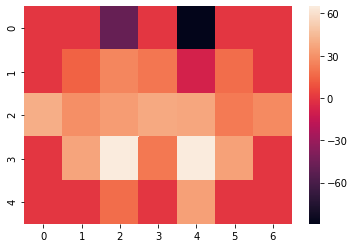

In [74]:
fig = plt.Figure()
fig = heatmap(mapping[:,:,0])

In [78]:
from matplotlib import animation

def init():
      heatmap(mapping[:,:, 0], vmax=.8, square=True)

def animate(i):
    plt.clf()
    data = (mapping[:,:, i])
    heatmap(data, vmax=.8, square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = True)
anim.to_jshtml()

AttributeError: 'AxesSubplot' object has no attribute 'canvas'

In [45]:
import keras_models.vanPutten as vanPutten
from importlib import reload
reload(vanPutten)

<module 'keras_models.vanPutten' from '/home/ms994/dbmi_eeg_clustering/keras_models/vanPutten.py'>

In [92]:
mapping[:,:,0].shape

(5, 7)

In [139]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=3, kernel_size=3, input_shape=(5,7, 1)))
cnn.add(keras.layers.Conv2D(filters=3, kernel_size=3))

In [ ]:
        Conv2D(100, (3,3)),
        Activation('relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(dropout),

        Conv2D(100, (3,3)),
        Activation('relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(dropout),

        Conv2D(300, (2,3)),
        Activation('relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(dropout),

        Conv2D(300, (1,7)),
        Activation('relu'),
        MaxPool2D(pool_size=(1, 2)),
        Dropout(dropout),

        Conv2D(300, (1,3)),
        Conv2D(300, (1,3)),
        Dense(activation='softmax', units=2)

In [140]:

out = cnn.predict(mapping[:,:,0].reshape(1,5,7,1))

In [141]:
out.shape

(1, 1, 3, 3)